<a href="https://colab.research.google.com/github/alvesmgabriel/intro-opencv/blob/main/aula-01-opencv-basico/opencv_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utilizando o básico do OpenCV**

Neste caderno, iremos utilizar a biblioteca [OpenCV](https://opencv.org/) para realizar tarefas de Visão Computacional. O primeiro passo é importar a biblioteca `cv2` para que possamos utilizar os recursos disponíveis para **ler**, **escrever** e **visualizar** uma imagem.

É importante observar que para *visualizar* uma imagem, geralmente, utilizamos a função `cv2.imshow()`. No entanto, esta função da biblioteca OpenCV não é compatível com o [jupyter notebook](https://jupyter.org/) que é a base para o Google Colab.

Portanto, para contornar o problema, o Google Colab disponibiliza a função `cv2_imshow()` a qual devemos importar. A segunda instrução importa apenas a função devido a um recurso do Python que permite a importação seletiva.

> Para verificar a documentação do OpenCV em Python, acesse a [documentação](https://docs.opencv.org/4.5.2/d6/d00/tutorial_py_root.html).

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

## Ler uma imagem

Depois de importar os recursos necessários, passamos para a etapa de ler uma imagem. Por enquanto, lidaremos com uma imagem. Posteriormente poderemos lidar com a leitura de várias imagens. O comando `cv2.imread()` apresentado a seguir mostra como carregar uma imagem.

In [ ]:
caminho_imagem = '/content/drive/MyDrive/Colab Notebooks/aula-01-opencv-basico/path-6567149_640.jpg'
imagem = cv2.imread( caminho_imagem )

A imagem foi carregada na pasta do Google Drive de modo que não seja necessário carregá-la toda vez que este *notebook* for executado. Para saber como conectar o Google Drive ao Google Colab veja este [vídeo](https://www.youtube.com/watch?v=_mIwsA2ddSc) que também está no Moodle.

> Importante: a imagem utilizada foi obtida no site [pixabay](https://pixabay.com/photos/path-rural-nature-road-countryside-6567149/).

### Informações básicas da imagem

Geralmente, queremos obter informações da imagem que foi lida. Um exemplo é saber o número de linhas (*rows*), de colunas (*columns*) e canais (*channels*) que é possível pelo atributo `shape`.

In [ ]:
imagem.shape

(640, 512, 3)

O comando a seguir obtém apenas as dimensões (linhas e colunas) da imagem.

In [ ]:
imagem.shape[:2]

(640, 512)

No exemplo acima, a saída foi `(640, 512, 3)` indicando que a imagem possui 640 linhas, 512 colunas e 3 canais (azul, verde e vermelho). Uma outra informação é saber o tamanho da imagem que é o resultado de `linhas x colunas x canais` obtido pelo atributo `size`.

In [ ]:
imagem.size

983040

O fato da imagem ser colorida implica três matrizes, daí o resultado de `640 x 512 x 3` é igual a `983040`. Talvez seja importante saber, também, qual o tipo de dado dos elementos das matrizes, neste caso o atributo `dtype` é útil.

In [ ]:
imagem.dtype

dtype('uint8')

A mensagem indica que o tipo dos elementos das matrizes é `uint8` (*unsigned int 8 bits*) o que significa que são elementos inteiros que representam valores entre o intervalo `[0 - 255]`, pois 2<sup>8</sup> = 256 valores.

> Curiosidade: o tipo `uint8` é compatível com o tipo `char` da linguagem C.

## Exibir a imagem

Após ler a imagem, vamos exibi-la. Neste ponto utilizaremos a função `cv2_imshow()` comentada acima.

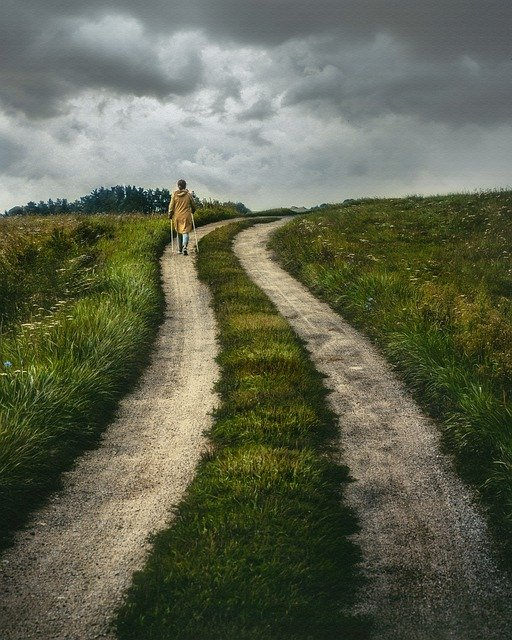

In [ ]:
cv2_imshow(imagem)

## Visualizar imagem com matplotlib

Uma outra possibilidade de visualizar imagens é utilizar a função `imshow()`, disponível em `pyplot` da bilbioteca [matplotlib](https://matplotlib.org/), ao invés da função `cv2_imshow()`. Para isso é necessário importar a bilbioteca e na sequência exibir a imagem. Vejamos:

(-0.5, 511.5, 639.5, -0.5)

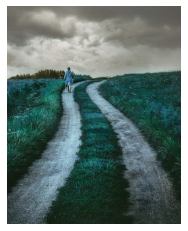

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(imagem)
plt.axis('off') # retira os eixos da imagem

Perceba que as cores da imagem estão diferentes se comparadas com a impressão utilizando a função `cv2_imshow()`. Isso dá pela questão da organização das cores, que no OpenCV é conhecida como **BGR** e não **RGB**.

## Formato BGR

A função `imshow()` exibe a imagem considerando que as camadas estão na ordem: *red*, *green* e *blue*. No entanto ao lermos uma imagem usando a biblioteca OpenCV as cores são organizadas da seguinte maneira: *blue*, *green*, *red*. Essa inversão faz com as cores da imagem fiquem diferentes. Uma maneira de contornar isso é utilizar a função `split()` que retornará três matrizes (*blue, green* e *red*).


In [ ]:
img_blue, img_green, img_red = cv2.split(imagem)
img_blue

array([[118, 115, 113, ...,  93,  88,  93],
       [121, 118, 117, ...,  93,  91,  94],
       [116, 115, 115, ...,  92,  94,  93],
       ...,
       [ 47,  41,  50, ...,  39,  20,  37],
       [ 55,  59,  65, ...,  25,  11,  38],
       [ 66,  67,  36, ...,  50,  34,  26]], dtype=uint8)

Depois de dividir a imagem em três matrizes, que se assemelham a imagens em tons de cinza, iremos visualizá-las usando o matplotlib. Perceba acima que exibimos os dados da matriz `img_blue` que possui valores na faixa `[0-255]`. Para que possamos visualizar essas matrizes como se fossem tons de cinza utilizamos o atributo `cmap` (*Colormap*) com o valor `gray`.

(-0.5, 511.5, 639.5, -0.5)

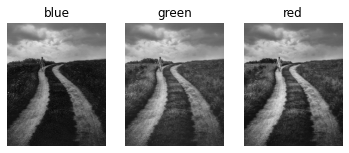

In [ ]:
fig = plt.figure()
# exibe matriz azul
ax = fig.add_subplot(1, 3, 1)
blueplot = plt.imshow(img_blue, cmap='gray')
ax.set_title("blue")
plt.axis('off')
# exibe matriz verde
ax = fig.add_subplot(1, 3, 2)
greenplot = plt.imshow(img_green, cmap='gray')
ax.set_title("green")
plt.axis('off')
# exibe matriz vermelho
ax = fig.add_subplot(1, 3, 3)
redplot = plt.imshow(img_red, cmap='gray')
ax.set_title("red")
plt.axis('off')


Agora, podemos **mesclar** as matrizes da maneira que o matplotlib exiba a imagem corretamente. Para isso precisamos da função `merge()`.

(-0.5, 511.5, 639.5, -0.5)

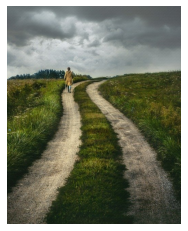

In [ ]:
imagem_rgb = cv2.merge([img_red, img_green, img_blue])
plt.imshow(imagem_rgb)
plt.axis('off')

## Acessando e alterando pixels na imagem

Podemos obter o valor BGR de um pixel, por exemplo, na posição `(x = 200, y = 200)`.

In [ ]:
(b, g, r) = imagem[200, 200]
print('blue: {0}; green: {1}; red: {2}'.format(b, g, r))

blue: 172; green: 191; red: 182


Podemos ainda obter o valor da cor de um único pixel, por exemplo, queremos saber o tom de vermelho no pixel cuja posição é `(313, 253)`.

In [ ]:
vermelho = imagem[313, 253, 2]
print('O valor de vermelho em (313, 253) é {0}'.format(vermelho))

O valor de vermelho em (313, 253) é 83


Outra possibilidade é obter um trecho da imagem. No exemplo a seguir selecionamos 400 linhas e 300 colunas da imagem cuja dimensão é `(640,512)`. Podemos utilizar o *slice* para realizar a seleção, o último campo informa que pretendo obter todos os canais de cores.

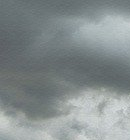

In [ ]:
trecho = imagem[0:140,0:130,:]
cv2_imshow(trecho)

Podemos também alterar a cor de um pixel ou de uma região. Para ilustrar isso, primeiro vamos fazer uma cópia da imagem lida. Vamos utilizar a função `copy()` da biblioteca [NumPy](https://numpy.org/). Na sequência vamos tornar a região selecionada anteriormente na cor preta.

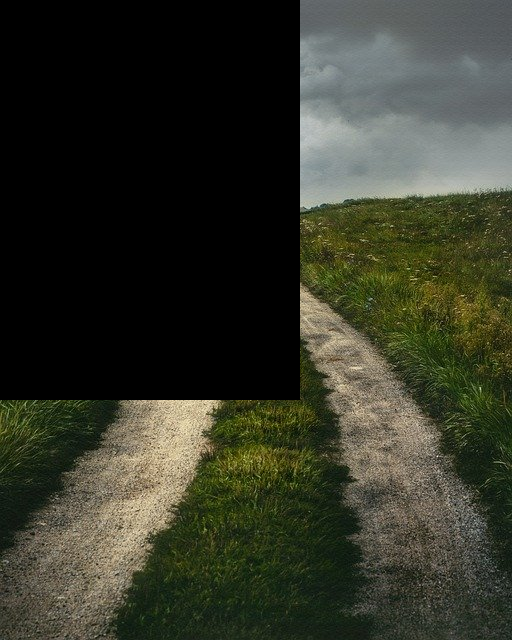

In [ ]:
import numpy as np
imagem2 = imagem.copy()
# coloco o valor zero em todas as camadas
imagem2[0:400, 0:300, :] = 0
cv2_imshow(imagem2)

No exemplo a seguir criamos uma nova cópia e colocamos a cor vermelho.

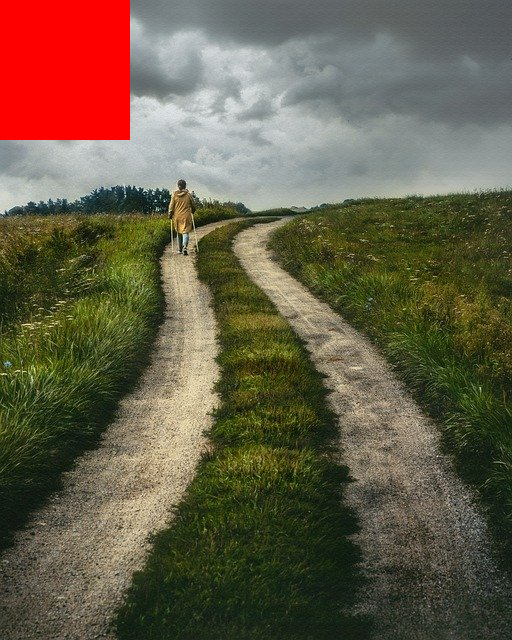

In [ ]:
imagem3 = imagem.copy()
imagem3[0:140, 0:130, :] = (0, 0, 255)
cv2_imshow(imagem3)

Utilizando as possibilidades do NumPy é possível separar a imagem ao invés de utilizar a função `split()`. Vejamos:

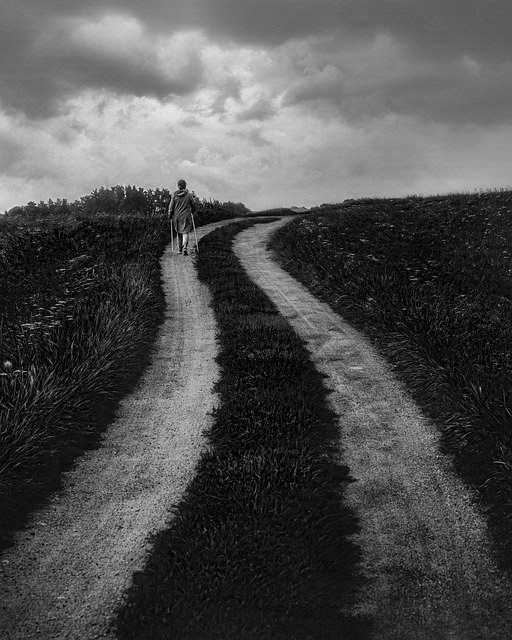

In [ ]:
m_blue  = imagem[:, :, 0]
m_green = imagem[:, :, 1]
m_red   = imagem[:, :, 2]
cv2_imshow(m_blue)

## Opções (*flags*) ao ler uma imagem

A função `imread()` oferece opções chamadas de *flag* ao ler uma imagem. Para obter uma lista detalhada das *flags* acesse a [documentação](https://docs.opencv.org/4.5.2/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56). A seguir um exemplo de converter uma imagem colorida para tons de cinza ao realizar a leitura. Neste caso a *flag* utilizada será `cv2.IMREAD_GRAYSCALE`.

> **Importante:** Um tom de cinza pode ser obtido a partir da média dos valores R, G, B de um determinado pixel.

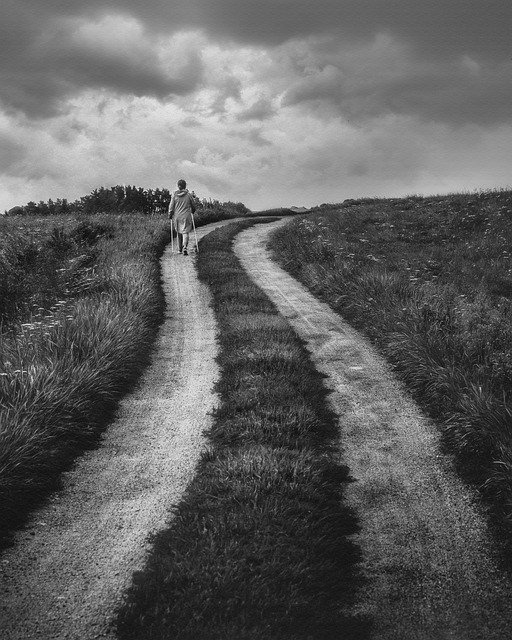

(640, 512)

In [ ]:
imagem_cinza = cv2.imread( caminho_imagem, cv2.IMREAD_GRAYSCALE)
cv2_imshow( imagem_cinza )
imagem_cinza.shape